<a href="https://colab.research.google.com/github/tripuragorla/CMPE-258-Assignment/blob/main/CMPE-258-Assignment/Assignment1/Assignment1_Part1/CMPE_258_Assignment1_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 13.2MB/s 
     |████████████████████████████████| 194kB 27.3MB/s 
     |████████████████████████████████| 1.2MB 26.7MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *

In [4]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.183678,0.027782,0.010825,27:53


epoch,train_loss,valid_loss,error_rate,time
0,0.067617,0.011055,0.004060,36:34


In [3]:
#hide_output
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [6]:
#hide
# For the book, we can't actually click an upload button, so we fake it
import types
uploader = types.SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [6]:
from PIL import Image
img = Image.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

AttributeError: ignored

In [54]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,3.109194,2.166273,01:14


epoch,train_loss,valid_loss,time
0,1.947571,1.624512,01:24
1,1.689450,1.445949,01:38
2,1.515786,1.233339,01:24
3,1.370551,0.963216,01:26
4,1.231888,0.849047,01:23
5,1.111544,0.775142,01:24
6,1.011604,0.751073,01:24
7,0.932083,0.738048,01:22


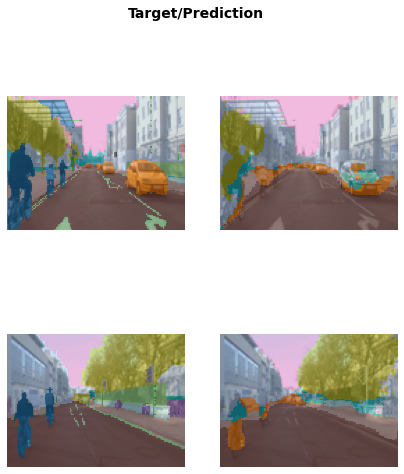

In [55]:
learn.show_results(max_n=6, figsize=(7,8))

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

KeyboardInterrupt: ignored

In [ ]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

Assignment Part 1: Blackbox deep learning

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.4MB/s 
     |████████████████████████████████| 194kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 7.9MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '<cdf2d9e136144b58bbbc440c9a80b0d0>')

In [6]:
search_images_bing

<function fastbook.search_images_bing>

In [51]:
results = search_images_bing('afbbb618dcfe495c8f097f39e6f406ca','german shepherd dogs')
images = results.attrgot('content_url')
len(images)

150

In [52]:
images

(#150) [None,None,None,None,None,None,None,None,None,None...]

In [48]:
dog_types = ['german shepherd', 'black', 'labrador']
path = Path('dogs')

In [49]:
if not path.exists():
    path.mkdir()
    for t in dog_types:
        dest = (path/t)
        print(dest)
        dest.mkdir(exist_ok=True)
        results = search_images_bing('afbbb618dcfe495c8f097f39e6f406ca', '{} dog'.format(t))
        download_images(dest, urls=results.attrgot('content_url'))

In [40]:
files = get_image_files(path)
files

(#0) []

In [41]:
corrupt = verify_images(files)
corrupt

(#0) []

In [42]:
dogs = DataBlock(
                  blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=41),
                  get_y=parent_label,
                  item_tfms=Resize(128)
                  )

In [43]:
dls = dogs.dataloaders(path)

TypeError: ignored

In [44]:
dls.valid.show_batch()

NameError: ignored